# Impact of COVID-19 in Mexico City during January 2022 
### COVID-19 Cases, Hospitalized People and Hospitals Capacity 
#### Carlos Eduardo Peña Muñoz - A00826254

In [1]:
#pip install xlrd

In [2]:
#pip install openpyxl

In [3]:
#pip install pandas

In [4]:
#pip install numpy

In [5]:
#pip install matplotlib

In [6]:
#pip install seaborn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%ls presentacion 

capacidadhospitalaria.csv  casospositivos.csv  personashospitalizadas.csv


### Data Set of Positive Cases of COVID-19

In [9]:
df = pd.read_csv('presentacion/casospositivos.csv')
df.head()

,fecha_toma_muestra,pruebas_totales,positivos_totales,pruebas_totales_cdmx,positivos_totales_cdmx,tasa_positividad,tasa_positividad_cdmx
0,2020-03-05,69,1,52,1,0.014493,0.019231
1,2020-03-13,57,2,46,1,0.035088,0.021739
2,2020-03-19,67,3,67,3,0.044776,0.044776
3,2020-03-24,66,1,60,1,0.015152,0.016667
4,2020-03-26,54,1,50,1,0.018519,0.020000


### Data Set of Hospitalized People because of COVID-19

In [10]:
de = pd.read_csv('presentacion/personashospitalizadas.csv')
de.head()

,fecha,año,mes,dia,hospitalizados_totales,hospitalizados_totales_cdmx,hospitalizados_totales_edomex,camas_intubados_totales,camas_intubados_cdmx,camas_intubados_edomex
0,2020-03-24,2020,marzo,24,50,50,0,39,39,0
1,2020-03-25,2020,marzo,25,105,105,0,33,33,0
2,2020-03-26,2020,marzo,26,128,128,0,42,42,0
3,2020-03-27,2020,marzo,27,175,175,0,60,60,0
4,2020-03-28,2020,marzo,28,257,257,0,78,78,0


### Data Set of Hospital's Capacity during COVID-19

In [11]:
da = pd.read_csv('presentacion/capacidadhospitalaria.csv')
da.head()

,Fecha,Nombre_hospital,Institucion,Estatus_capacidad_hospitalaria,Estatus_capacidad_UCI,Coordenadas
0,2020-06-13,HOSPITAL GENERAL DE ZONA C/MF 29 (S. JUAN ARAGÓN),IMSS,Media,Buena,"19.465117,-99.085162"
1,2020-06-13,HOSPITAL GENERAL DE ZONA 47 (CDMX SUR) (IZP),IMSS,Media,Buena,"19.357566,-99.054269"
2,2020-06-13,UNIDAD MÓVIL TEMPORAL COVID,IMSS,Crítica,Media,"19.403082,-99.089177"
3,2020-06-13,HOSPITAL GENERAL REGIONAL 72,IMSS,Media,Media,"19.356913,-98.990929"
4,2020-06-13,HOSPITAL GENERAL REGIONAL 196,IMSS,Crítica,Media,"19.515133,-98.891450"


#### First we have to clean up the data...

In [12]:
df.drop(['pruebas_totales','tasa_positividad','pruebas_totales','positivos_totales'],
        axis = 1,
        inplace = True)
df.columns

Index(['fecha_toma_muestra', 'pruebas_totales_cdmx', 'positivos_totales_cdmx',
       'tasa_positividad_cdmx'],
      dtype='object')

In [13]:
df.rename(columns = {'pruebas_totales_cdmx' : 'Number of Tests',
                     'positivos_totales_cdmx' : 'Number of Positive Cases',
                     'fecha_toma_muestra' : 'Date',
                     'tasa_positividad_cdmx' : 'Positivity Rate',},
          inplace = True
         )

In [14]:
de.drop(['año','mes','dia','hospitalizados_totales','hospitalizados_totales_edomex','camas_intubados_totales','camas_intubados_edomex'],
        axis = 1,
        inplace = True)
de.columns

Index(['fecha', 'hospitalizados_totales_cdmx', 'camas_intubados_cdmx'], dtype='object')

In [15]:
de.rename(columns = {'fecha' : 'Date',
                     'hospitalizados_totales_cdmx' : 'Number of Hospitalized Cases',
                     'camas_intubados_cdmx' : 'Number of Intubated Cases'},
          inplace = True
         )

In [16]:
da.drop(['Coordenadas','Estatus_capacidad_UCI'],
        axis = 1,
        inplace = True)
da.columns

Index(['Fecha', 'Nombre_hospital', 'Institucion',
       'Estatus_capacidad_hospitalaria'],
      dtype='object')

In [17]:
da.rename(columns = {'Fecha' : 'Date',
                     'Nombre_hospital' : 'Name of the Hospital',
                     'Institucion' : 'Institution',
                     'Estatus_capacidad_hospitalaria' : 'Hospital Capacity Status',},
          inplace = True
         )

#### Now, lets filter the data...

In [18]:
dt = df[(df['Date'] > '2022-01-01') & (df['Date'] < '2022-01-31')]

In [19]:
do = de[(de['Date'] > '2022-01-01') & (de['Date'] < '2022-01-31')]

In [20]:
dp = da[(da['Date'] > '2022-01-01') & (da['Date'] < '2022-01-31')]

#### Data now is filtered specifically for to show relevant information gathered during January 2022.

## Clean Data Sets and Explanation of the Variables

### Data Set of Positive Cases of COVID-19 during January 2022

In [21]:
dt.head()

,Date,Number of Tests,Number of Positive Cases,Positivity Rate
651,2022-01-02,1776,515,0.289977
652,2022-01-03,12115,4132,0.341065
653,2022-01-04,14725,5228,0.355042
654,2022-01-05,16678,6486,0.388896
655,2022-01-06,18337,7088,0.386541


#### Description of Variables
###### Date: The exact date registered.
###### Number of Test: Number of tests taken each day.
###### Number of Positive Cases: Number of positive cases each day.
###### Positivity Rate: Daily rate of positive cases vs number of tests each day.

### Data Set of Hospitalized People during January 2022

In [22]:
do.head()

,Date,Number of Hospitalized Cases,Number of Intubated Cases
634,2022-01-02,241,90
635,2022-01-03,293,103
636,2022-01-04,321,99
637,2022-01-05,360,99
638,2022-01-06,409,103


#### Description of Variables
###### Date: The exact date registered.
###### Number of Hospitalized Cases: Number of hospitalized people that tested positive to COVID-19.
###### Number of Intubated Cases: Number of hospitalized people that tested positive to COVID-19 and required an intubation procedure.

In [23]:
do.head()

,Date,Number of Hospitalized Cases,Number of Intubated Cases
634,2022-01-02,241,90
635,2022-01-03,293,103
636,2022-01-04,321,99
637,2022-01-05,360,99
638,2022-01-06,409,103


### Data Set of Hospital's Capacity during January 2022

In [24]:
dp.head()

,Date,Name of the Hospital,Institution,Hospital Capacity Status
50083,2022-01-02,INSTITUTO NACIONAL DE NUTRICIÓN,SSA,Buena
50084,2022-01-02,INER,SSA,Buena
50085,2022-01-02,HOSPITAL GENERAL DE MÉXICO,SSA,Buena
50086,2022-01-02,HOSPITAL JUAREZ,SSA,Buena
50087,2022-01-02,HOSPITAL GENERAL DR. MANUEL GEA GONZÁLEZ,SSA,Buena


#### Description of Variables
###### Date: The exact date registered.
###### Name of the Hospital: Name of the Hospital in the gathered data.
###### Institution: Institution in charge of each hospital.
###### Hospital Capacity: Capacity of every hospital during COVID-19 pandemic.

## 1.- What was the daily rate of positive cases of COVID-19 during January 2022 in Mexico City?

In [25]:
myPivot = pd.pivot_table(dt,
                         index = 'Date',
                         values = 'Positivity Rate',
                        )
myPivot

,Positivity Rate
Date,
2022-01-02,0.289977
2022-01-03,0.341065
2022-01-04,0.355042
2022-01-05,0.388896
2022-01-06,0.386541
2022-01-07,0.390514
2022-01-08,0.352720
2022-01-09,0.352813
2022-01-10,0.405580


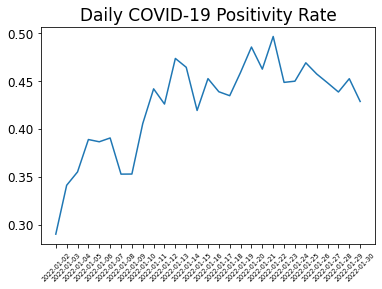

In [26]:
x = myPivot

plt.xticks(rotation = 45, fontsize = 6.5)
plt.yticks(fontsize = 12)
plt.title('Daily COVID-19 Positivity Rate', fontsize = 17)

plt.plot(x)

### Conclusion
##### Here we can visualize the daily positivity rate of every COVID-19 test registered during January 2022.

## 2.- How does the regression plot look like comparing: "Number of Tests" & "Number of Positive Cases" during January 2022?

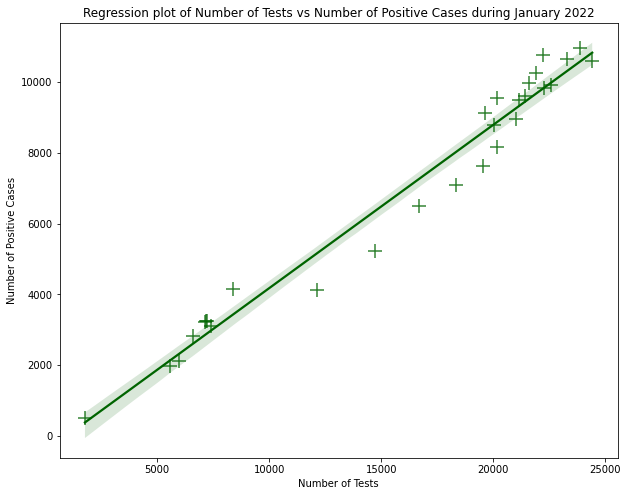

In [28]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x = 'Number of Tests',
                 y = 'Number of Positive Cases',
                 data = dt,
                 color = 'darkgreen',
                 marker = '+',
                 scatter_kws = {'s':200}
                )

ax.set(xlabel = 'Number of Tests',
      ylabel = 'Number of Positive Cases')


ax.set_title('Regression plot of Number of Tests vs Number of Positive Cases during January 2022')
plt.show()

## Conclusion
#### This graph allows us to visualize the increment of COVID-19 positive cases during January 2022 in Mexico City.

## 3.- What is the comparisson betwen every COVID-19 positive tested case & the quantity of cases that required to be hospitalized during January 2022?

In [29]:
Var1 = dt['Number of Positive Cases']
Var2 = do['Number of Hospitalized Cases']
Var3 = do['Date']

In [30]:
mix = df.groupby([Var3,Var1,Var2]).size()
mix = mix.to_frame()
mix = mix.rename(columns = {0: 'Countzz'})
mix.drop('Countzz', axis = 1, inplace = True)
mix = mix.reset_index()
mix

,Date,Number of Positive Cases,Number of Hospitalized Cases
0,2022-01-20,515.0,1514.0
1,2022-01-21,4132.0,1524.0
2,2022-01-22,5228.0,1584.0
3,2022-01-23,6486.0,1657.0
4,2022-01-24,7088.0,1749.0
5,2022-01-25,7624.0,1817.0
6,2022-01-26,1971.0,1843.0
7,2022-01-27,2107.0,1856.0
8,2022-01-29,8170.0,1940.0
9,2022-01-30,9827.0,1943.0


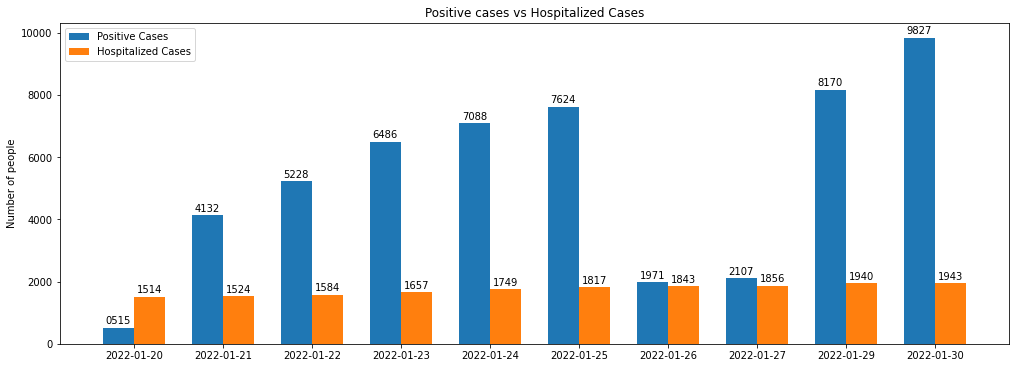

In [31]:
x = np.arange(len(mix['Date']))
width = 0.35
fig, ax = plt.subplots(figsize = (14, 5), layout = 'constrained')

rect1 = ax.bar(x - width/2, mix['Number of Positive Cases'], width, label = 'Positive Cases'
               )
rect2 = ax.bar(x + width/2, mix['Number of Hospitalized Cases'], width, label = 'Hospitalized Cases'
               )

ax.set_ylabel('Number of people')
ax.set_title('Positive cases vs Hospitalized Cases')
ax.set_xticks(x, mix['Date'])
ax.legend()

ax.bar_label(rect1,fmt='%.4d', padding=2)
ax.bar_label(rect2,fmt='%.4d', padding=2)

plt.show()

## Conclusion
#### As we can see, the number of positive tested cases fluctuates every day without a patern; in the other hand, the number of hospitalized cases remain almost constant during January 2022.

## 4.- What is the coorelation between the number of hospitalized cases and the number of intubated cases?

In [32]:
myPivot2 = pd.pivot_table(do,
                         index = 'Date',
                         values = ['Number of Hospitalized Cases', 'Number of Intubated Cases'],
                        )
myPivot2

,Number of Hospitalized Cases,Number of Intubated Cases
Date,,
2022-01-02,241,90
2022-01-03,293,103
2022-01-04,321,99
2022-01-05,360,99
2022-01-06,409,103
2022-01-07,461,109
2022-01-08,495,118
2022-01-09,520,136
2022-01-10,600,153


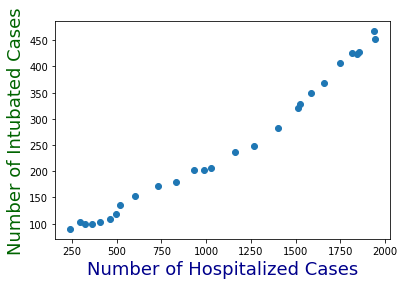

In [33]:
x = do["Number of Hospitalized Cases"]
y = do["Number of Intubated Cases"]

plt.scatter(x,y)
plt.xlabel('Number of Hospitalized Cases', fontsize = 18, color = 'darkblue')
plt.ylabel('Number of Intubated Cases', fontsize = 18, color = 'darkgreen')
plt.show()

### Conclusion
#### This graph shows the coorelation between the number of hospitalized cases and the number of intubated cases. We can visualize that a strong positive coorelation exists; as the number of hospitalized cases increaces, the number of intubated cases increases as well.